In [76]:
import numpy as np
import torch
import torch.nn as nn

features = np.load('batched_data\\features.npy')
labels = np.load('batched_data\\labels.npy')

In [77]:
features = torch.tensor(features).transpose(-1,-2)
labels = torch.tensor(labels)

print(features.shape)
print(labels.shape)

torch.Size([6971, 5760, 2])
torch.Size([6971])


In [78]:
y = torch.zeros((labels.shape[0], 5760))

for i in range(len(labels)):
    y[i][int(labels[i])] = 1.0

print(y.shape)
print(labels[0])

torch.Size([6971, 5760])
tensor(5670., dtype=torch.float64)


In [79]:
class model(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(model, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.softMax = nn.LogSoftmax(dim=-1)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.softMax(x)
        return x


In [80]:
from torch import optim

inputSize = 2
hiddenSize = 1

lstm = model(inputSize, hiddenSize)
lossFunction = nn.CrossEntropyLoss()
optim = optim.Adam(lstm.parameters(), lr = 1e-3)


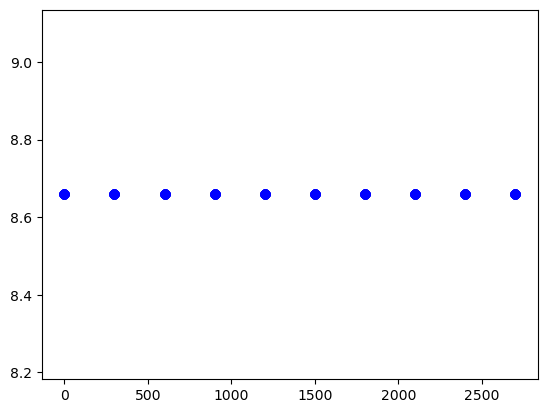

In [81]:
from matplotlib import pyplot as plt

batchSize = 300
numIters = 10
epochs = 100

for i in range(0, numIters * batchSize, batchSize):
    batch = features[i:i+batchSize]
    batchedLabels = y[i:i+batchSize].double()

    for _ in range(epochs):
        out = lstm(batch).squeeze()
    
        loss = lossFunction(out, batchedLabels)
        
        optim.zero_grad()

        loss.backward()
        optim.step()
        plt.scatter(i, loss.detach().numpy(), color="b")
